In [88]:
# Import necessary packages
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np
from soundfile import write
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [71]:
songs = [
    '../../Songs/Kanye West/Late Registration/13 Diamonds From Sierra Leone (feat. JAY-Z).m4a',
    '../../Songs/Kanye West/My Beautiful Dark Twisted Fantasy/08 Devil In a New Dress (feat. Rick Ross).m4a',
    '../../Songs/Kanye West/The College Dropout/07 Jesus Walks.m4a',
    '../../Songs/Kanye West/The College Dropout/12 Slow Jamz.m4a',
    '../../Songs/Kanye West/ye/06 Ghost Town (feat. PARTYNEXTDOOR).m4a',
    '../../Songs/Kanye West/Yeezus/05 Hold My Liquor.m4a',
    '../../Songs/Weezer/Make Believe/01 Beverly Hills.m4a',
    '../../Songs/Weezer/Pinkerton/01 Tired of Sex.m4a',
    '../../Songs/Weezer/Pinkerton/08 Pink Triangle.m4a',
    '../../Songs/Weezer/Weezer/04 Buddy Holly.m4a',
    '../../Songs/Weezer/Weezer/07 Say It Ain\'t So.m4a',
    '../../Songs/Weezer/Weezer/09 Holiday.m4a'
]

In [74]:
def summarize(song):
    y, _ = librosa.load(song)
    RMS = librosa.feature.rms(y=y)
    ZCR = librosa.feature.zero_crossing_rate(y = y)
    Spec = librosa.feature.melspectrogram(y=y)
    Spec = librosa.amplitude_to_db(Spec)
    MFCC = librosa.feature.mfcc(y=y)
    Chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return np.concatenate(([RMS.mean(), RMS.var(), ZCR.mean(), ZCR.var()], Chroma.mean(axis=1), Chroma.var(axis=1), MFCC.mean(axis=1), MFCC.var(axis=1)))
    

In [ ]:
songSummaries = np.array([summarize(x) for x in songs])

In [148]:
scaler = StandardScaler().fit(songSummaries)
scaledSummaries = scaler.transform(songSummaries)

In [149]:
kmeans = KMeans(n_clusters=2, init='random').fit(scaledSummaries)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

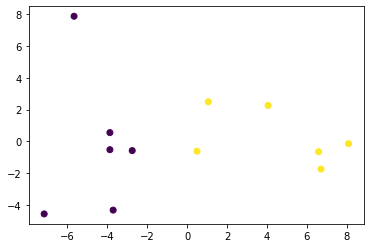

In [150]:
pca = PCA(svd_solver='full')
pca.fit(scaledSummaries, )
transform = pca.transform(scaledSummaries)
plt.scatter(transform[:,0], transform[:,1], c=kmeans.labels_)
